In [1]:
pip install pandas scipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
from scipy.cluster.hierarchy import linkage, fcluster
import pandas as pd

In [3]:
file_path = 'feedback_Testing.xlsx'
df = pd.read_excel(file_path)

In [4]:
input_channels = ['Email', 'Feedback form', 'Survey', 'Interviews', 'Dataset Like/Vote/Rate/Fav']
output_channels = ['Blog/News', 'Newsletter']
both_channels = ['Social Media', 'User Forum / Discussion Forum']

In [5]:
data_for_clustering = df.set_index('Country')

In [6]:
# Perform hierarchical clustering
linkage_matrix = linkage(data_for_clustering, method='ward')

In [7]:
# Assign clusters based on a threshold (e.g., 3 clusters)
n_clusters = 3
cluster_labels = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')
data_for_clustering['Cluster'] = cluster_labels

In [8]:
# Calculate the mean for each cluster
cluster_profiles = data_for_clustering.groupby('Cluster').mean()


In [9]:
# Add the number of countries in each cluster
cluster_profiles['Country Count'] = data_for_clustering['Cluster'].value_counts()


In [10]:
# Display the cluster profiles
print(cluster_profiles.T)

Cluster                               1    2          3
Email                          1.000000  1.0   1.000000
Feedback form                  1.000000  0.8   0.941176
Survey                         0.000000  0.0   0.411765
 Interviews                    0.428571  1.0   0.647059
Dataset Like/Vote/Rate/Fav     0.428571  0.6   0.588235
Blog/News                      0.000000  0.8   1.000000
Newsletter                     0.000000  0.0   0.411765
Social Media                   0.714286  1.0   1.000000
User Forum / Discussion Forum  0.000000  1.0   0.058824
Country Count                  7.000000  5.0  17.000000


In [11]:
cluster_profiles.T

Cluster,1,2,3
Email,1.000000,1.0,1.000000
Feedback form,1.000000,0.8,0.941176
Survey,0.000000,0.0,0.411765
Interviews,0.428571,1.0,0.647059
Dataset Like/Vote/Rate/Fav,0.428571,0.6,0.588235
Blog/News,0.000000,0.8,1.000000
Newsletter,0.000000,0.0,0.411765
Social Media,0.714286,1.0,1.000000
User Forum / Discussion Forum,0.000000,1.0,0.058824
Country Count,7.000000,5.0,17.000000


In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [13]:
# Test for different cluster sizes (2 to 10)
inertia = []
silhouette_scores = []

In [16]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_for_clustering)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_for_clustering, kmeans.labels_))

In [17]:
# Determine the optimal number of clusters
optimal_k = range(2, 11)[silhouette_scores.index(max(silhouette_scores))]
print(f'Optimal number of clusters: {optimal_k}')

Optimal number of clusters: 2


In [19]:
# Final K-means clustering with the optimal number of clusters
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
final_kmeans.fit(data_for_clustering)
data_for_clustering['Cluster'] = final_kmeans.labels_

In [20]:
# Summarize clusters
cluster_summary = data_for_clustering.groupby('Cluster').mean()
print(cluster_summary)

         Email  Feedback form    Survey   Interviews  \
Cluster                                                
0          1.0       1.000000  0.000000     0.500000   
1          1.0       0.904762  0.333333     0.714286   

         Dataset Like/Vote/Rate/Fav  Blog/News  Newsletter  Social Media  \
Cluster                                                                    
0                          0.375000        0.0    0.000000          0.75   
1                          0.619048        1.0    0.333333          1.00   

         User Forum / Discussion Forum  
Cluster                                 
0                             0.125000  
1                             0.238095  


In [21]:
cluster_summary

,Email,Feedback form,Survey,Interviews,Dataset Like/Vote/Rate/Fav,Blog/News,Newsletter,Social Media,User Forum / Discussion Forum
Cluster,,,,,,,,,
0,1.0,1.000000,0.000000,0.500000,0.375000,0.0,0.000000,0.75,0.125000
1,1.0,0.904762,0.333333,0.714286,0.619048,1.0,0.333333,1.00,0.238095


In [22]:
# Group the data by clusters and calculate the mean for each feedback channel
cluster_profiles = data_for_clustering.groupby('Cluster').mean()

In [23]:
# Add a count of the countries in each cluster
cluster_profiles['Country Count'] = data_for_clustering['Cluster'].value_counts()

In [24]:
# Transpose for better readability
cluster_profiles_transposed = cluster_profiles.T
print(cluster_profiles_transposed)

Cluster                            0          1
Email                          1.000   1.000000
Feedback form                  1.000   0.904762
Survey                         0.000   0.333333
 Interviews                    0.500   0.714286
Dataset Like/Vote/Rate/Fav     0.375   0.619048
Blog/News                      0.000   1.000000
Newsletter                     0.000   0.333333
Social Media                   0.750   1.000000
User Forum / Discussion Forum  0.125   0.238095
Country Count                  8.000  21.000000


In [25]:
cluster_profiles_transposed

Cluster,0,1
Email,1.000,1.000000
Feedback form,1.000,0.904762
Survey,0.000,0.333333
Interviews,0.500,0.714286
Dataset Like/Vote/Rate/Fav,0.375,0.619048
Blog/News,0.000,1.000000
Newsletter,0.000,0.333333
Social Media,0.750,1.000000
User Forum / Discussion Forum,0.125,0.238095
Country Count,8.000,21.000000


In [28]:
# Add country names to the clustered data if not already included
data_for_clustering['Country'] = df['Country']  # Replace with actual column name for countries


In [29]:
# Group countries by cluster and display
countries_by_cluster = data_for_clustering.groupby('Cluster')['Country'].apply(list)
print(countries_by_cluster)

Cluster
0             [nan, nan, nan, nan, nan, nan, nan, nan]
1    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
Name: Country, dtype: object


In [ ]:
**Another Try***

In [ ]:
**Another Try***

In [30]:
pip install pandas scipy matplotlib


Note: you may need to restart the kernel to use updated packages.


In [31]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

In [32]:
file_path = 'feedback_Testing.xlsx'  # Replace with the path to your file
df = pd.read_excel(file_path)

In [33]:
data_for_clustering = df.drop(columns=['Country'])

In [34]:
linkage_matrix = linkage(data_for_clustering, method='ward')


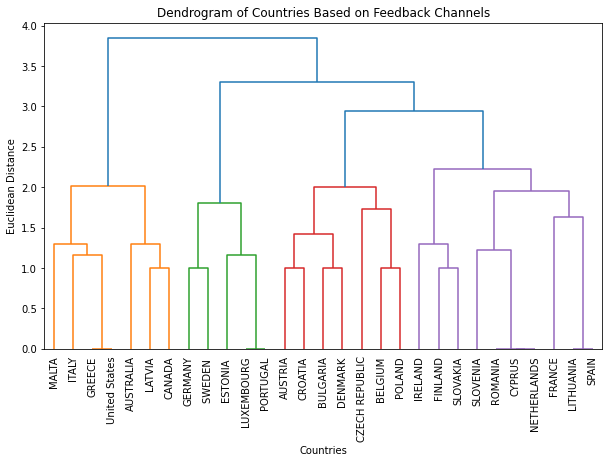

In [35]:
# Step 4: Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=df['Country'].values, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrogram of Countries Based on Feedback Channels")
plt.xlabel("Countries")
plt.ylabel("Euclidean Distance")
plt.show()

In [50]:
# Step 5: Assign clusters based on a distance threshold
threshold = 10  # Adjust this to control the number of clusters
clusters = fcluster(linkage_matrix, t=3, criterion='distance')

In [51]:
# Add the cluster labels to the DataFrame
df['Cluster'] = clusters

In [52]:
# Step 6: Create a cluster profiling table
cluster_profiles = df.groupby('Cluster').mean()

In [53]:
# Add a list of countries for each cluster
cluster_profiles['Countries'] = df.groupby('Cluster')['Country'].apply(list)


In [54]:
# Print the profiling table
print(cluster_profiles.reset_index())

   Cluster  Email  Feedback form    Survey   Interviews  \
0        1    1.0       1.000000  0.000000     0.428571   
1        2    1.0       0.800000  0.000000     1.000000   
2        3    1.0       0.941176  0.411765     0.647059   

   Dataset Like/Vote/Rate/Fav  Blog/News  Newsletter  Social Media  \
0                    0.428571        0.0    0.000000      0.714286   
1                    0.600000        0.8    0.000000      1.000000   
2                    0.588235        1.0    0.411765      1.000000   

   User Forum / Discussion Forum  \
0                       0.000000   
1                       1.000000   
2                       0.058824   

                                           Countries  
0  [GREECE, ITALY, LATVIA, MALTA, AUSTRALIA, Unit...  
1  [ESTONIA , GERMANY, LUXEMBOURG, PORTUGAL, SWED...  
2  [AUSTRIA, BELGIUM, BULGARIA, CROATIA, CYPRUS, ...  


In [55]:
cluster_profiles.reset_index()

,Cluster,Email,Feedback form,Survey,Interviews,Dataset Like/Vote/Rate/Fav,Blog/News,Newsletter,Social Media,User Forum / Discussion Forum,Countries
0,1,1.0,1.000000,0.000000,0.428571,0.428571,0.0,0.000000,0.714286,0.000000,"[GREECE, ITALY, LATVIA, MALTA, AUSTRALIA, Unit..."
1,2,1.0,0.800000,0.000000,1.000000,0.600000,0.8,0.000000,1.000000,1.000000,"[ESTONIA , GERMANY, LUXEMBOURG, PORTUGAL, SWED..."
2,3,1.0,0.941176,0.411765,0.647059,0.588235,1.0,0.411765,1.000000,0.058824,"[AUSTRIA, BELGIUM, BULGARIA, CROATIA, CYPRUS, ..."


In [58]:
# Set pandas option to display the full content of the column
pd.set_option('display.max_colwidth', None)

cluster_profiles['Countries']

Cluster
1                                                                                                        [GREECE, ITALY, LATVIA, MALTA, AUSTRALIA, United States, CANADA]
2                                                                                                                      [ESTONIA , GERMANY, LUXEMBOURG, PORTUGAL, SWEDEN ]
3    [AUSTRIA, BELGIUM, BULGARIA, CROATIA, CYPRUS, CZECH REPUBLIC, DENMARK, FINLAND, FRANCE, IRELAND, LITHUANIA, NETHERLANDS, POLAND, ROMANIA, SLOVAKIA, SLOVENIA, SPAIN]
Name: Countries, dtype: object

In [59]:
cluster_profiles = df.groupby('Cluster').mean()

In [60]:
cluster_profiles['Countries'] = df.groupby('Cluster')['Country'].apply(list)

In [61]:
pd.set_option('display.max_colwidth', None)

In [62]:
cluster_profiles

,Email,Feedback form,Survey,Interviews,Dataset Like/Vote/Rate/Fav,Blog/News,Newsletter,Social Media,User Forum / Discussion Forum,Countries
Cluster,,,,,,,,,,
1,1.0,1.000000,0.000000,0.428571,0.428571,0.0,0.000000,0.714286,0.000000,"[GREECE, ITALY, LATVIA, MALTA, AUSTRALIA, United States, CANADA]"
2,1.0,0.800000,0.000000,1.000000,0.600000,0.8,0.000000,1.000000,1.000000,"[ESTONIA , GERMANY, LUXEMBOURG, PORTUGAL, SWEDEN ]"
3,1.0,0.941176,0.411765,0.647059,0.588235,1.0,0.411765,1.000000,0.058824,"[AUSTRIA, BELGIUM, BULGARIA, CROATIA, CYPRUS, CZECH REPUBLIC, DENMARK, FINLAND, FRANCE, IRELAND, LITHUANIA, NETHERLANDS, POLAND, ROMANIA, SLOVAKIA, SLOVENIA, SPAIN]"


In [63]:
cluster_profiles.to_excel('Cluster_Profiling.xlsx', sheet_name='Profiles')

In [ ]:
*** Another Try with 3 Clusters ***

In [28]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

In [29]:
# Load your data
file_path = 'feedback_Testing.xlsx'  # Replace with your actual file path
feedback_df = pd.read_excel(file_path)

In [30]:
# Prepare the data for clustering
data_for_clustering = feedback_df.drop(columns=['Country'])


In [31]:
# Perform hierarchical clustering
linkage_matrix = linkage(data_for_clustering, method='ward')


In [32]:
# Set the threshold for 3 clusters
correct_threshold = 3  # Adjust based on dendrogram height for 3 clusters


In [33]:
# Generate cluster assignments for 3 clusters
clusters = fcluster(linkage_matrix, t=3, criterion='maxclust')
feedback_df['Cluster'] = clusters

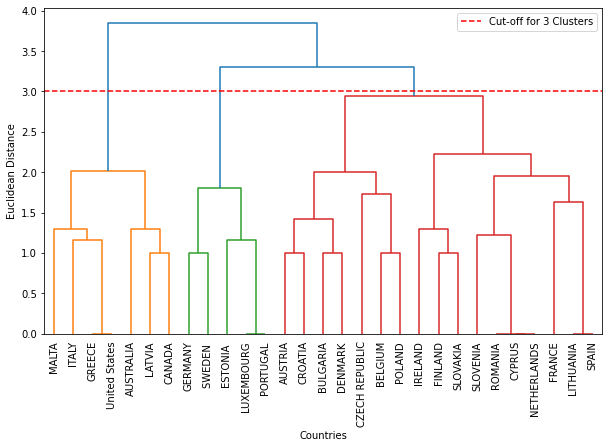

In [35]:
# Plot the dendrogram with 3 consistent colors
plt.figure(figsize=(10, 6))
dendrogram(
    linkage_matrix,
    labels=feedback_df['Country'].values,
    leaf_rotation=90,
    leaf_font_size=10,
    color_threshold=correct_threshold  # Set to threshold for consistent 3 colors
)
plt.axhline(y=correct_threshold, color='r', linestyle='--', label='Cut-off for 3 Clusters')
#plt.title("Dendrogram with 3 Clusters")
plt.xlabel("Countries")
plt.ylabel("Euclidean Distance")
plt.legend()
plt.savefig("Dendrogram_3_Clusters_Consistent.pdf", format='pdf')
plt.show()


In [ ]:
((** Now with Acronym of the Counteries))

In [45]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

In [46]:
# Load your data
file_path = 'feedback_Testing.xlsx'  # Replace with your actual file path
feedback_df = pd.read_excel(file_path)

In [47]:
# Define the mapping dictionary (country names -> acronyms)
country_to_acronym = {
    'Australia': 'AU', 'Austria': 'AT', 'Belgium': 'BE', 'Bulgaria': 'BG',
    'Canada': 'CA', 'Croatia': 'HR', 'Cyprus': 'CY', 'Czech Republic': 'CZ',
    'Denmark': 'DK', 'Estonia': 'EE', 'Finland': 'FI', 'France': 'FR',
    'Germany': 'DE', 'Greece': 'GR', 'Ireland': 'IE', 'Italy': 'IT',
    'Latvia': 'LV', 'Lithuania': 'LT', 'Luxembourg': 'LU', 'Malta': 'MT',
    'Netherlands': 'NL', 'Poland': 'PL', 'Portugal': 'PT', 'Romania': 'RO',
    'Slovakia': 'SK', 'Slovenia': 'SI', 'Spain': 'ES', 'Sweden': 'SE',
    'United States': 'US'
}

In [48]:

# Clean and normalize the 'Country' column
feedback_df['Country'] = feedback_df['Country'].str.strip().str.title()  # Remove spaces and standardize case


In [49]:
# Check unmapped countries
unmapped_countries = feedback_df[~feedback_df['Country'].isin(country_to_acronym.keys())]
if not unmapped_countries.empty:
    print("Unmapped countries detected. Please update the mapping dictionary with the following:")
    print(unmapped_countries['Country'].unique())

In [50]:
# Map full country names to acronyms
feedback_df['Country'] = feedback_df['Country'].map(country_to_acronym)

In [51]:
# Verify mapping
if feedback_df['Country'].isna().any():
    print("Some countries could not be mapped to acronyms. Check the dictionary or dataset.")


In [52]:
# Prepare the data for clustering
data_for_clustering = feedback_df.drop(columns=['Country'])

In [53]:
# Perform hierarchical clustering
linkage_matrix = linkage(data_for_clustering, method='ward')

In [54]:
# Set the threshold for 3 clusters
correct_threshold = 3  # Adjust based on dendrogram height for 3 clusters

In [55]:
# Generate cluster assignments for 3 clusters
clusters = fcluster(linkage_matrix, t=3, criterion='maxclust')
feedback_df['Cluster'] = clusters

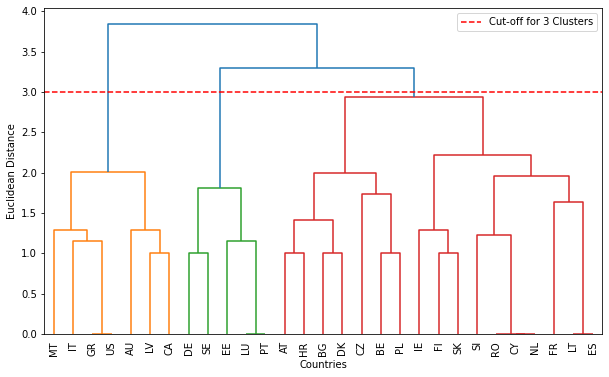

In [57]:
# Plot the dendrogram with 3 consistent colors and acronyms
plt.figure(figsize=(10, 6))
dendrogram(
    linkage_matrix,
    labels=feedback_df['Country'].values,  # Use acronyms for labels
    leaf_rotation=90,
    leaf_font_size=10,
    color_threshold=correct_threshold  # Ensure consistent 3 colors
)
plt.axhline(y=correct_threshold, color='r', linestyle='--', label='Cut-off for 3 Clusters')
#plt.title("Dendrogram with 3 Clusters (Acronyms)")
plt.xlabel("Countries")
plt.ylabel("Euclidean Distance")
plt.legend()
plt.savefig("Dendrogram_3_Clusters_Acronyms_Fixed.pdf", format='pdf')
plt.show()